<a href="https://colab.research.google.com/github/bharath1604/Machine-Learning/blob/master/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from time import time
import logging

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [8]:
ifw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(ifw_people)

{'data': array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32), 'images': array([[[254.      , 254.      , 251.66667 , ...,  65.333336,
          50.666668,  40.333332],
        [253.33333 , 251.33333 , 247.33333 , ...,  66.666664,
          52.      ,  42.666668],
        [240.66667 , 231.66667 , 211.66667 , ...,  62.      ,
          49.      ,  42.      ],
        ...,
        [ 74.333336,  54.      ,  31.666666, ...,  97.666664,
          93.      ,  90.

In [9]:
ifw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [10]:
# introspect the images arrays to find the shapes (for plotting)
n_samples,h, w =ifw_people.images.shape

In [11]:
n_samples # this sample face

1288

In [12]:
h

50

In [13]:
w

37

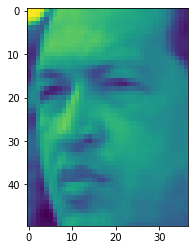

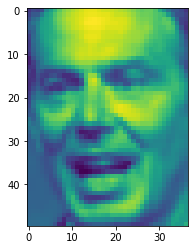

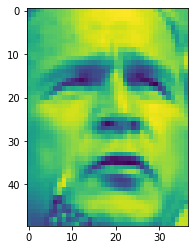

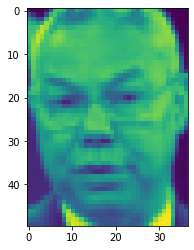

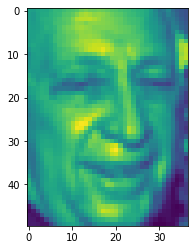

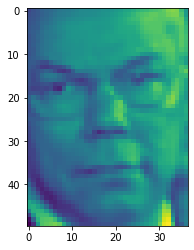

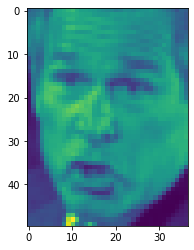

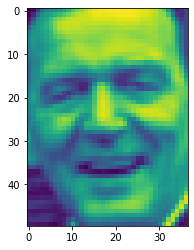

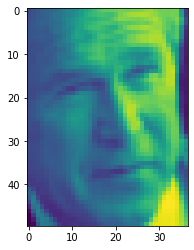

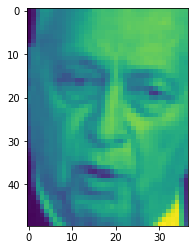

In [14]:
for i in range(10):
  plt.imshow(ifw_people.images[i])
  plt.show()

In [15]:
x = ifw_people.data
n_features = x.shape[1]

In [16]:
# the label to predict is the id of the person
y = ifw_people.target
target_names = ifw_people.target_names
n_classes = target_names.shape[0]

In [17]:
print("Total dataset size:")
print("n_sampes: %d", n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d " % n_classes)

Total dataset size:
n_sampes: %d 1288
n_features: 1850
n_classes: 7 


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [20]:
n_components = 150

print("Extracting the top %d eignfaces from %d faces"
        % (n_components, x_train.shape[0]))
t0 = time()
pca = PCA(n_components = n_components, svd_solver='randomized',
            whiten =True).fit(x_train)
print("done in %0.3fs" % (time()- t0))

Extracting the top 150 eignfaces from 966 faces
done in 0.208s


In [21]:
eigenfaces = pca.components_.reshape((n_components,h,w))

In [22]:
print("projecting the input data on the eigenfaces orthonormal basis")
to = time()
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print("done in %0.3fs" % (time() - to))

projecting the input data on the eigenfaces orthonormal basis
done in 0.033s


In [23]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 5e4,1e5],
              'gamma': [0.0001,0.0005,0.005,0.01,0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid_search")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 32.392s
Best estimator found by grid_search
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [24]:
print("predicting people names in the test set")
t0 =time()
y_pred = clf.predict(x_test_pca)

print("done in %0.3fs " % (time() - t0))

print(classification_report(y_test,y_pred,target_names=target_names))

predicting people names in the test set
done in 0.088s 
                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.67      0.78        21
     Colin Powell       0.78      0.82      0.80        57
  Donald Rumsfeld       0.83      0.71      0.77        35
    George W Bush       0.76      0.96      0.85       123
Gerhard Schroeder       0.93      0.64      0.76        22
      Hugo Chavez       1.00      0.68      0.81        28
       Tony Blair       0.96      0.72      0.83        36

         accuracy                           0.82       322
        macro avg       0.89      0.74      0.80       322
     weighted avg       0.84      0.82      0.81       322



In [25]:
def plot_gallery(images,titles,h,w,n_row=3, n_col=4):
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom = 0, left= .01, right = .99, top= .90, hspace=.35)
  for i in range(n_row*n_col):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [26]:
def title(y_pred, y_test, target_names, i):
  pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
  true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
  return 'predicted: %s\ntrue:  %s' %(pred_name,true_name)

In [27]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                    for i in range(y_pred.shape[0])]

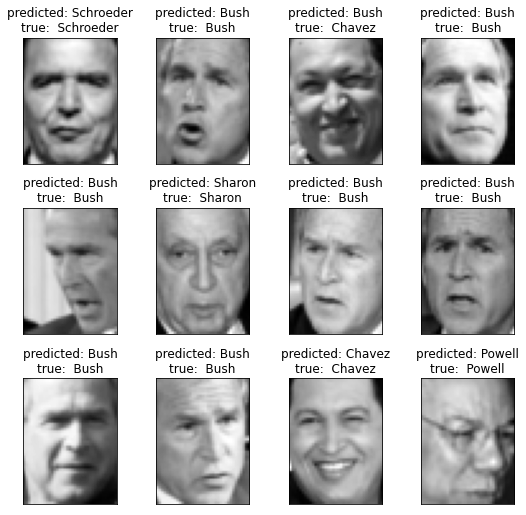

In [28]:
plot_gallery(x_test, prediction_titles, h,w)

In [29]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

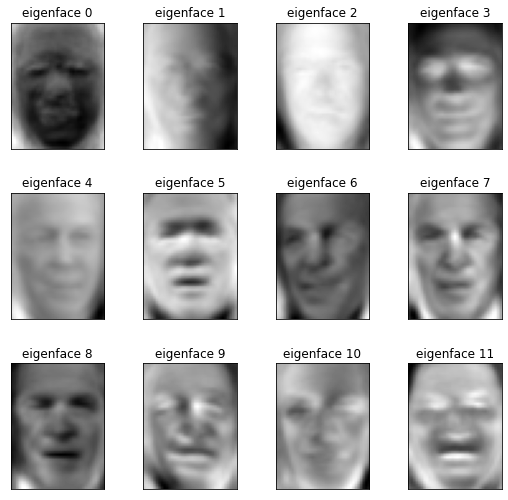

In [30]:
plot_gallery(eigenfaces,eigenface_titles,h,w)